# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from sklearn.linear_model import LinearRegression

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
unit = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | bardiyah
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | eatonton
Processing Record 10 of Set 1 | chifeng
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | zhovtneve
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | coffs harbour
Processing Record 17 of Set 1 | kibaya
Processing Record 18 of Set 1 | byron bay
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | bluff
Processing Recor

Processing Record 40 of Set 4 | saskylakh
Processing Record 41 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 4 | ancud
Processing Record 43 of Set 4 | pahrump
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | zhezkazgan
Processing Record 47 of Set 4 | sorong
Processing Record 48 of Set 4 | san carlos de bariloche
Processing Record 49 of Set 4 | qasigiannguit
Processing Record 0 of Set 5 | cayenne
Processing Record 1 of Set 5 | elizabeth city
Processing Record 2 of Set 5 | sakakah
Processing Record 3 of Set 5 | kondinskoye
Processing Record 4 of Set 5 | thalgau
Processing Record 5 of Set 5 | magadan
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | bouloupari
Processing Record 8 of Set 5 | rawson
Processing Record 9 of Set 5 | mar del plata
Processing Record 10 of Set 5 | sydney
Processing Record 11 of Set 5 | tabou
Processing Record 12 of Set 5 | chapaevsk
Processin

Processing Record 29 of Set 8 | athabasca
Processing Record 30 of Set 8 | havelock
Processing Record 31 of Set 8 | klyuchi
Processing Record 32 of Set 8 | krasnoarmeysk
Processing Record 33 of Set 8 | mandalgovi
Processing Record 34 of Set 8 | staryy nadym
Processing Record 35 of Set 8 | tagusao
Processing Record 36 of Set 8 | castro
Processing Record 37 of Set 8 | chickasha
Processing Record 38 of Set 8 | roma
Processing Record 39 of Set 8 | zyryanka
Processing Record 40 of Set 8 | necochea
Processing Record 41 of Set 8 | tukrah
Processing Record 42 of Set 8 | kuching
Processing Record 43 of Set 8 | agirish
Processing Record 44 of Set 8 | abiy adi
City not found. Skipping...
Processing Record 45 of Set 8 | kolding
Processing Record 46 of Set 8 | acapulco
Processing Record 47 of Set 8 | sidi ali
Processing Record 48 of Set 8 | namibe
Processing Record 49 of Set 8 | ucluelet
Processing Record 0 of Set 9 | governador valadares
Processing Record 1 of Set 9 | saraland
Processing Record 2 o

Processing Record 21 of Set 12 | taoudenni
Processing Record 22 of Set 12 | mersing
Processing Record 23 of Set 12 | moosomin
Processing Record 24 of Set 12 | capitao poco
Processing Record 25 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 26 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 27 of Set 12 | edson
Processing Record 28 of Set 12 | viedma
Processing Record 29 of Set 12 | nayudupeta
Processing Record 30 of Set 12 | harper
Processing Record 31 of Set 12 | marathon
Processing Record 32 of Set 12 | caala
Processing Record 33 of Set 12 | praia da vitoria
Processing Record 34 of Set 12 | renfrew
Processing Record 35 of Set 12 | mount gambier
Processing Record 36 of Set 12 | warrnambool
Processing Record 37 of Set 12 | lolua
City not found. Skipping...
Processing Record 38 of Set 12 | caravelas
Processing Record 39 of Set 12 | fredericton
Processing Record 40 of Set 12 | minggang
Processing Record 41 of Set 12 | dabola
Processing

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,23.78,75,4,1.78,ZA,1677225838
1,bathsheba,13.2167,-59.5167,24.34,73,20,6.17,BB,1677226081
2,bardiyah,31.7561,25.0865,14.76,75,0,3.56,LY,1677226081
3,mataura,-46.1927,168.8643,12.28,67,0,2.27,NZ,1677225818
4,hasaki,35.7333,140.8333,12.22,80,100,4.29,JP,1677225851


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,23.78,75,4,1.78,ZA,1677225838
1,bathsheba,13.2167,-59.5167,24.34,73,20,6.17,BB,1677226081
2,bardiyah,31.7561,25.0865,14.76,75,0,3.56,LY,1677226081
3,mataura,-46.1927,168.8643,12.28,67,0,2.27,NZ,1677225818
4,hasaki,35.7333,140.8333,12.22,80,100,4.29,JP,1677225851


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

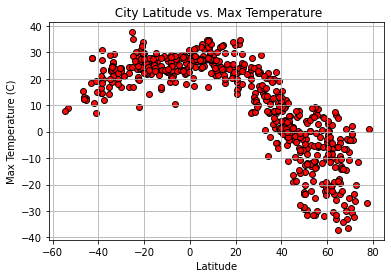

In [35]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="red", edgecolors="black",
            alpha=0.95)
plt.xlabel("Latitude")
plt.title(" City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

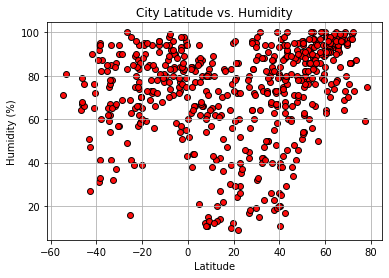

In [36]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="red", edgecolors="black",
            alpha=0.95)
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

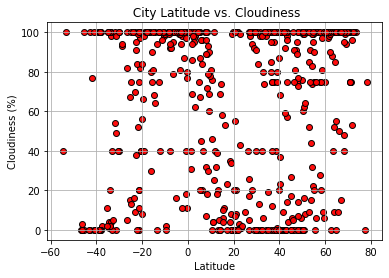

In [37]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="red", edgecolors="black",
            alpha=0.95)
plt.xlabel("Latitude")
plt.title(" City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

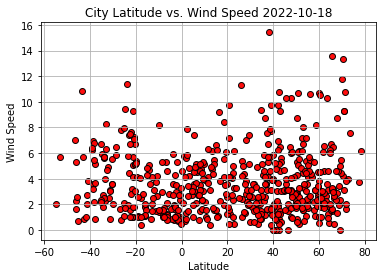

In [38]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black",
            alpha=0.95)
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed 2022-10-18")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
def plot_linear_regression(x_values, y_values, y_label, x_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Fit linear regression model
    reg = LinearRegression().fit(x_values.to_numpy().reshape(-1, 1), y_values)
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Create line of best fit
    plt.plot(x_values, reg.predict(x_values.to_numpy().reshape(-1, 1)), color='red')
    
    # Add labels and title
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title("Linear Regression: {} vs. {}".format(y_label, x_label))
    
    print(f"The r-value is: {rvalue**2}")
    
    plt.show()

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bathsheba,13.2167,-59.5167,24.34,73,20,6.17,BB,1677226081
2,bardiyah,31.7561,25.0865,14.76,75,0,3.56,LY,1677226081
4,hasaki,35.7333,140.8333,12.22,80,100,4.29,JP,1677225851
5,sao filipe,14.8961,-24.4956,21.51,70,58,6.66,CV,1677225892
6,jamestown,42.0970,-79.2353,1.12,79,100,9.77,US,1677225673


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,23.78,75,4,1.78,ZA,1677225838
3,mataura,-46.1927,168.8643,12.28,67,0,2.27,NZ,1677225818
7,bredasdorp,-34.5322,20.0403,22.79,59,1,2.69,ZA,1677225885
10,busselton,-33.6500,115.3333,25.75,41,4,4.01,AU,1677225841
12,rikitea,-23.1203,-134.9692,26.53,75,9,4.47,PF,1677225839


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7268310412558874


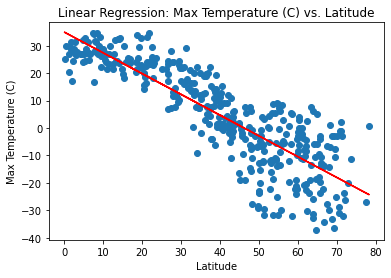

In [82]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
y_label = "Max Temperature (C)"
x_label = "Latitude"

plot_linear_regression(x_values, y_values, y_label, x_label)

The r-value is: 0.20765507330061417


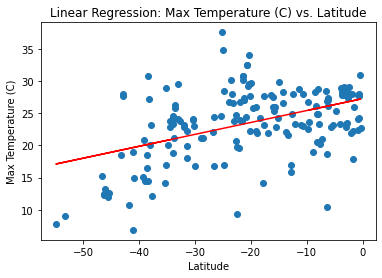

In [83]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
y_label = "Max Temperature (C)"
x_label ="Latitude"

plot_linear_regression(x_values, y_values, y_label, x_label)

**Discussion about the linear relationship:** The temperatrue decreaseis more steep in the Northern Hemisphere than the Southern hemisphere, which indicates a stronger correlation in the north than the south.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22091677784298316


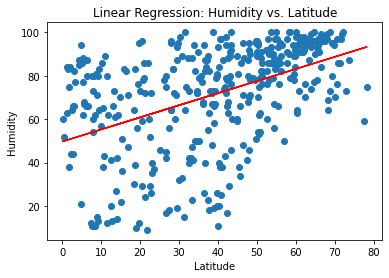

In [84]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
y_label = "Humidity"
x_label = "Latitude"

plot_linear_regression(x_values, y_values, y_label, x_label)

The r-value is: 0.07879313945042994


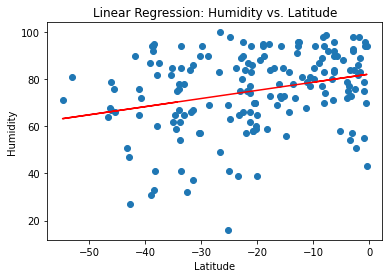

In [85]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
y_label = "Humidity"
x_label = "Latitude"

plot_linear_regression(x_values, y_values, y_label, x_label)

**Discussion about the linear relationship:** Some small degree of correlation between between latitude and humidity in the Northern Hemisphere which is higher than that in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05026497935249587


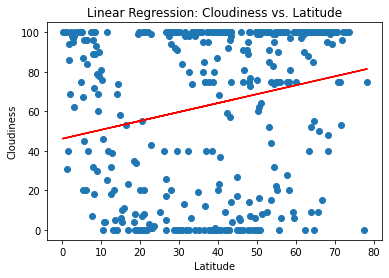

In [87]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
y_label = "Cloudiness"
x_label = "Latitude"

plot_linear_regression(x_values, y_values, y_label, x_label)

The r-value is: 0.17105055888681342


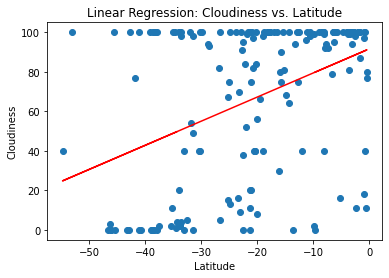

In [88]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
y_label = "Cloudiness"
x_label = "Latitude"

plot_linear_regression(x_values, y_values, y_label, x_label)

**Discussion about the linear relationship:** No obvious correlation between latitude and cloudiness in both the northern and southern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0060957337735088905


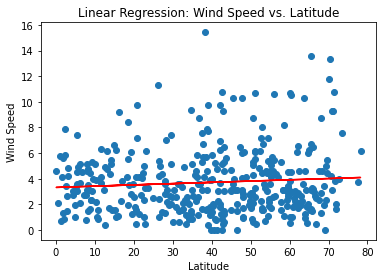

In [89]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
y_label = "Wind Speed"
x_label = "Latitude"

plot_linear_regression(x_values, y_values, y_label, x_label)

The r-value is: 0.11142762377818195


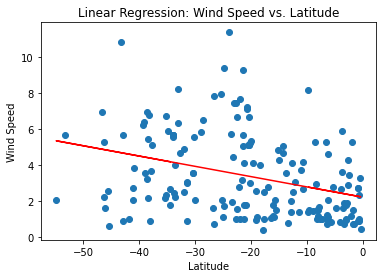

In [90]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
y_label = "Wind Speed"
x_label = "Latitude"

plot_linear_regression(x_values, y_values, y_label, x_label)

**Discussion about the linear relationship:** No apparent correlation